In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey")

Skipping, found downloaded files in "./mental-health-in-tech-survey" (use force=True to force download)


In [ ]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# 'Pandas' is used for data manipulation and analysis
import pandas as pd

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# import 'is_string_dtype' to check if the type of input is string
from pandas.api.types import is_string_dtype

# import various functions to perform classification
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
# display all columns of the dataframe
pd.options.display.max_columns = None

In [ ]:
data_set = pd.read_csv('/content/mental-health-in-tech-survey/survey.csv')
data_set.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
#setting the plot size using rcParams
plt.rcParams['figure.figsize'] = [15,8]


In [ ]:
data_set.shape

(1259, 27)

In [ ]:
data_set.dtypes

,0
Timestamp,object
Age,int64
Gender,object
Country,object
state,object
self_employed,object
family_history,object
treatment,object
work_interfere,object
no_employees,object


In [ ]:
#Splitting the timestamp feature as it includes both date and time
data_set[['Date','Time']]=data_set['Timestamp'].str.split(" ",n=1,expand=True)

In [ ]:
#dropping the timestamp column as we have already created two columns which have date and time
#axis=1 deletes the entire column
data_set.drop('Timestamp',axis=1,inplace=True)

In [ ]:
#converting the datatype of date and time columns
data_set['Time']=pd.to_datetime(data_set['Time'],format='%H:%M:%S')
data_set['Date']=pd.to_datetime(data_set['Date'])

In [ ]:
#finally checking the columns and their datatypes after alteration
data_set.dtypes

,0
Age,int64
Gender,object
Country,object
state,object
self_employed,object
family_history,object
treatment,object
work_interfere,object
no_employees,object
remote_work,object


In [ ]:
data_set.describe()

,Age,Date,Time
count,1.259000e+03,1259,1259
mean,7.942815e+07,2014-09-09 10:54:14.011120128,1900-01-01 13:21:38.166004992
min,-1.726000e+03,2014-08-27 00:00:00,1900-01-01 00:02:36
25%,2.700000e+01,2014-08-27 00:00:00,1900-01-01 11:19:59.500000
50%,3.100000e+01,2014-08-28 00:00:00,1900-01-01 13:18:44
75%,3.600000e+01,2014-08-28 00:00:00,1900-01-01 16:13:40
max,1.000000e+11,2016-02-01 00:00:00,1900-01-01 23:59:59
std,2.818299e+09,NaN,NaN


In [ ]:
data_set.describe(include=object)

,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1259,744,1241,1259,1259,995,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,49,48,45,2,2,2,4,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2,160
top,Male,United States,CA,No,No,Yes,Sometimes,6-25,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,615,751,138,1095,767,637,465,290,883,1031,477,501,842,646,819,563,490,925,774,516,1008,557,576,1075,5


In [ ]:
#finding the unique values in the column gender
data_set['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [ ]:
error={'Female':'F',
      'Male':'M',
      'male':'M',
      'female':'F',
      'm':'M',
      'Male-ish':'M',
      'maile':'M',
      'Trans-female':'T',
      'Cis Female':'F',
      'something kinda male?':'M',
      'Cis Male':'M',
      'Woman':'F',
      'f':'F',
      'Mal':'M',
       'Male (CIS)':'M',
      'queer/she/they':'F',
      'non-binary':'T',
      'Enby':'T',
      'Femake':'F',
      'woman':'F',
      'Make':'M',
      'fluid':'T',
      'Malr':'M',
      'cis male':'M',
      'Female (cis)':'F',
      'Guy (-ish) ^_^':'M',
      'queer':'T',
      'Female (trans)':'T',
      'male leaning androgynous':'T',
       'Neuter':'T',
       'cis-female/femme':'F',
       'msle':'M',
       'Agender':'T',
       'Genderqueer':'T',
       'Female':'F',
       'Androgyne':'T',
       'Nah':'T',
       'All':'T',
      'Female ':'F',
       'Male ':'M',
       'Man':'M',
       'Trans woman':'T',
       'Mail':'M',
       'A little about you':'T'}
data_set['Gender']=data_set['Gender'].map(error).fillna(data_set['Gender'])

In [ ]:
data_set['Gender'].unique()

array(['F', 'M', 'T', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

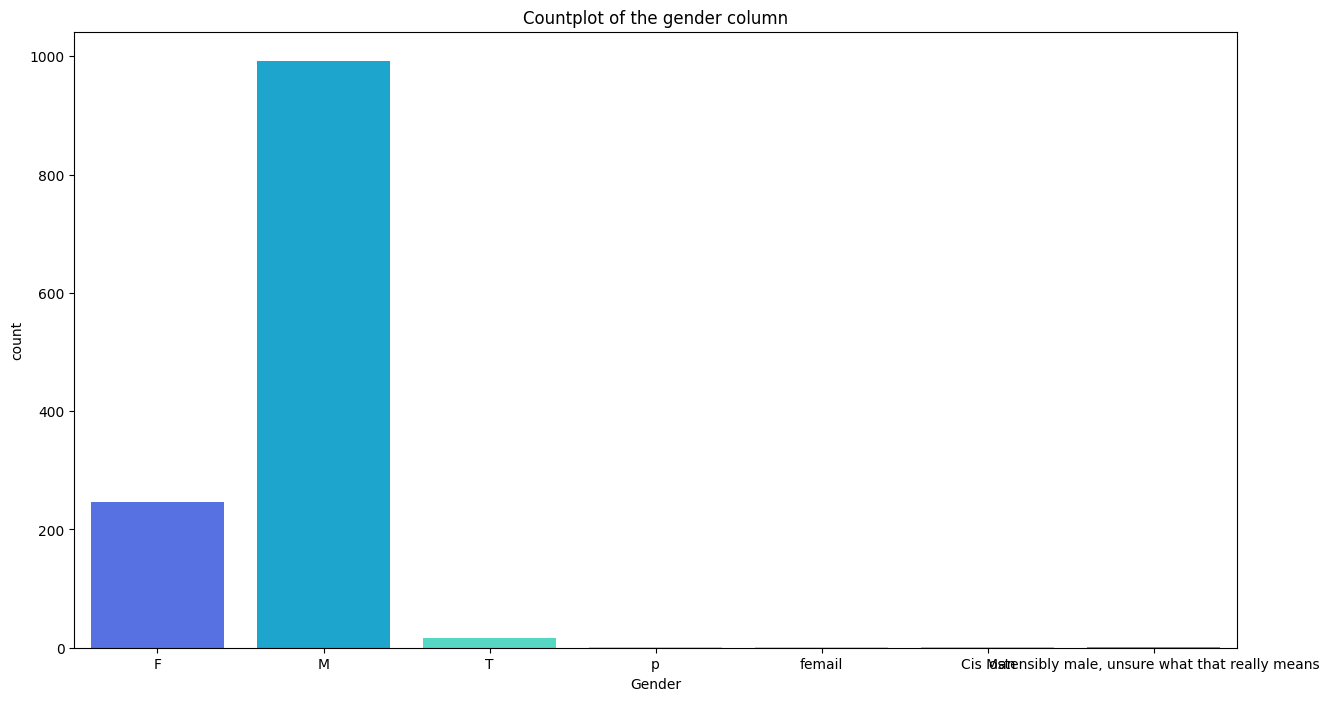

In [ ]:
#plotting the countplot for the gender column
sns.countplot(x='Gender', data = data_set, palette='rainbow')
plt.title("Countplot of the gender column")
plt.show()

In [ ]:
#Checking the number of male,female and transgender in the gender column
data_set['Gender'].value_counts()

,count
Gender,
M,992
F,247
T,16
p,1
femail,1
Cis Man,1
"ostensibly male, unsure what that really means",1


In [ ]:
#finding the unique values of age column
data_set['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In [ ]:
#removing the redundant values from the age column
data_set=data_set[data_set['Age']!=99999999999]
data_set=data_set[data_set['Age']!=-29]
data_set=data_set[data_set['Age']!=329]
data_set=data_set[data_set['Age']!=-1726]
data_set=data_set[data_set['Age']!=5]
data_set=data_set[data_set['Age']!=8]

In [ ]:
# replace 'no' with zero
data_set['treatment'] = data_set['treatment'].replace('No', 0)
# replace 'yes' with one
data_set['treatment'] = data_set['treatment'].replace('Yes', 1)

In [ ]:
#displaying the first 5 records to check the treatment column after label enconding
data_set.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Date,Time
0,37,F,United States,IL,NaN,No,1,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,2014-08-27,1900-01-01 11:29:31
1,44,M,United States,IN,NaN,No,0,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN,2014-08-27,1900-01-01 11:29:37
2,32,M,Canada,NaN,NaN,No,0,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN,2014-08-27,1900-01-01 11:29:44
3,31,M,United Kingdom,NaN,NaN,Yes,1,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,2014-08-27,1900-01-01 11:29:46
4,31,M,United States,TX,NaN,No,0,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,2014-08-27,1900-01-01 11:30:22


,count
treatment,
1,633
0,620


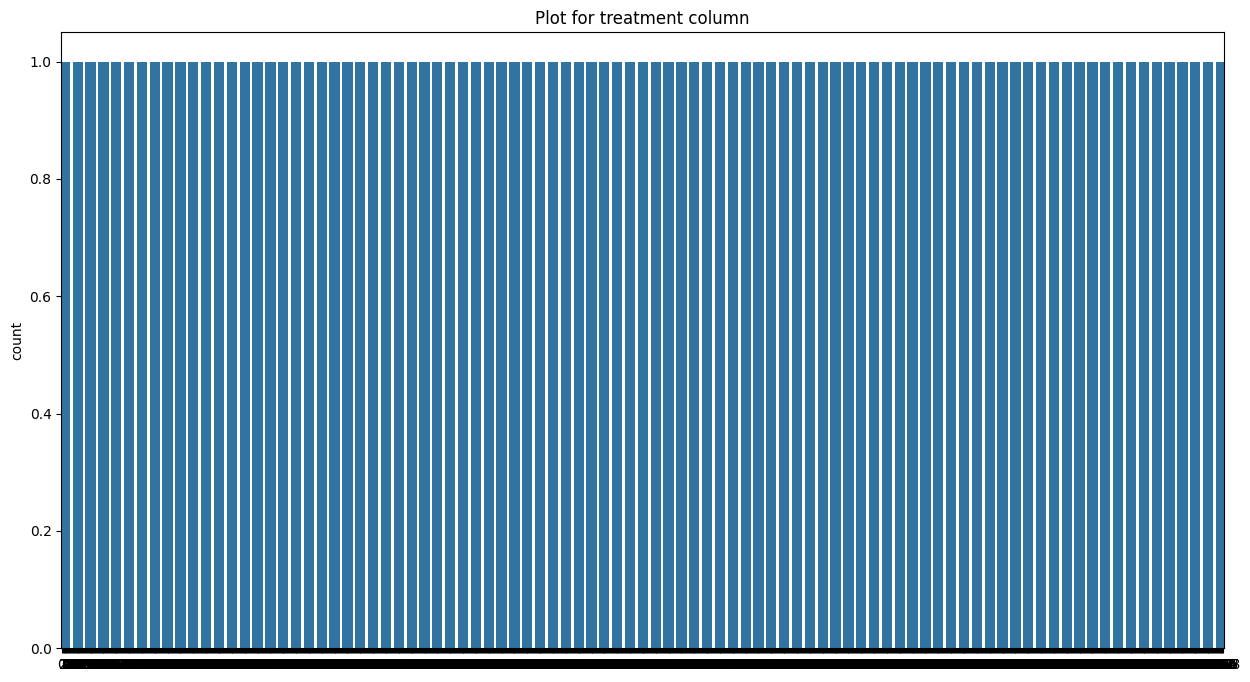

In [ ]:
#plotting the countplot for treatment column
sns.countplot(data_set['treatment'])
plt.title("Plot for treatment column")

#checking the count of each class
data_set['treatment'].value_counts()

In [ ]:
# Exploratory Data Analysis

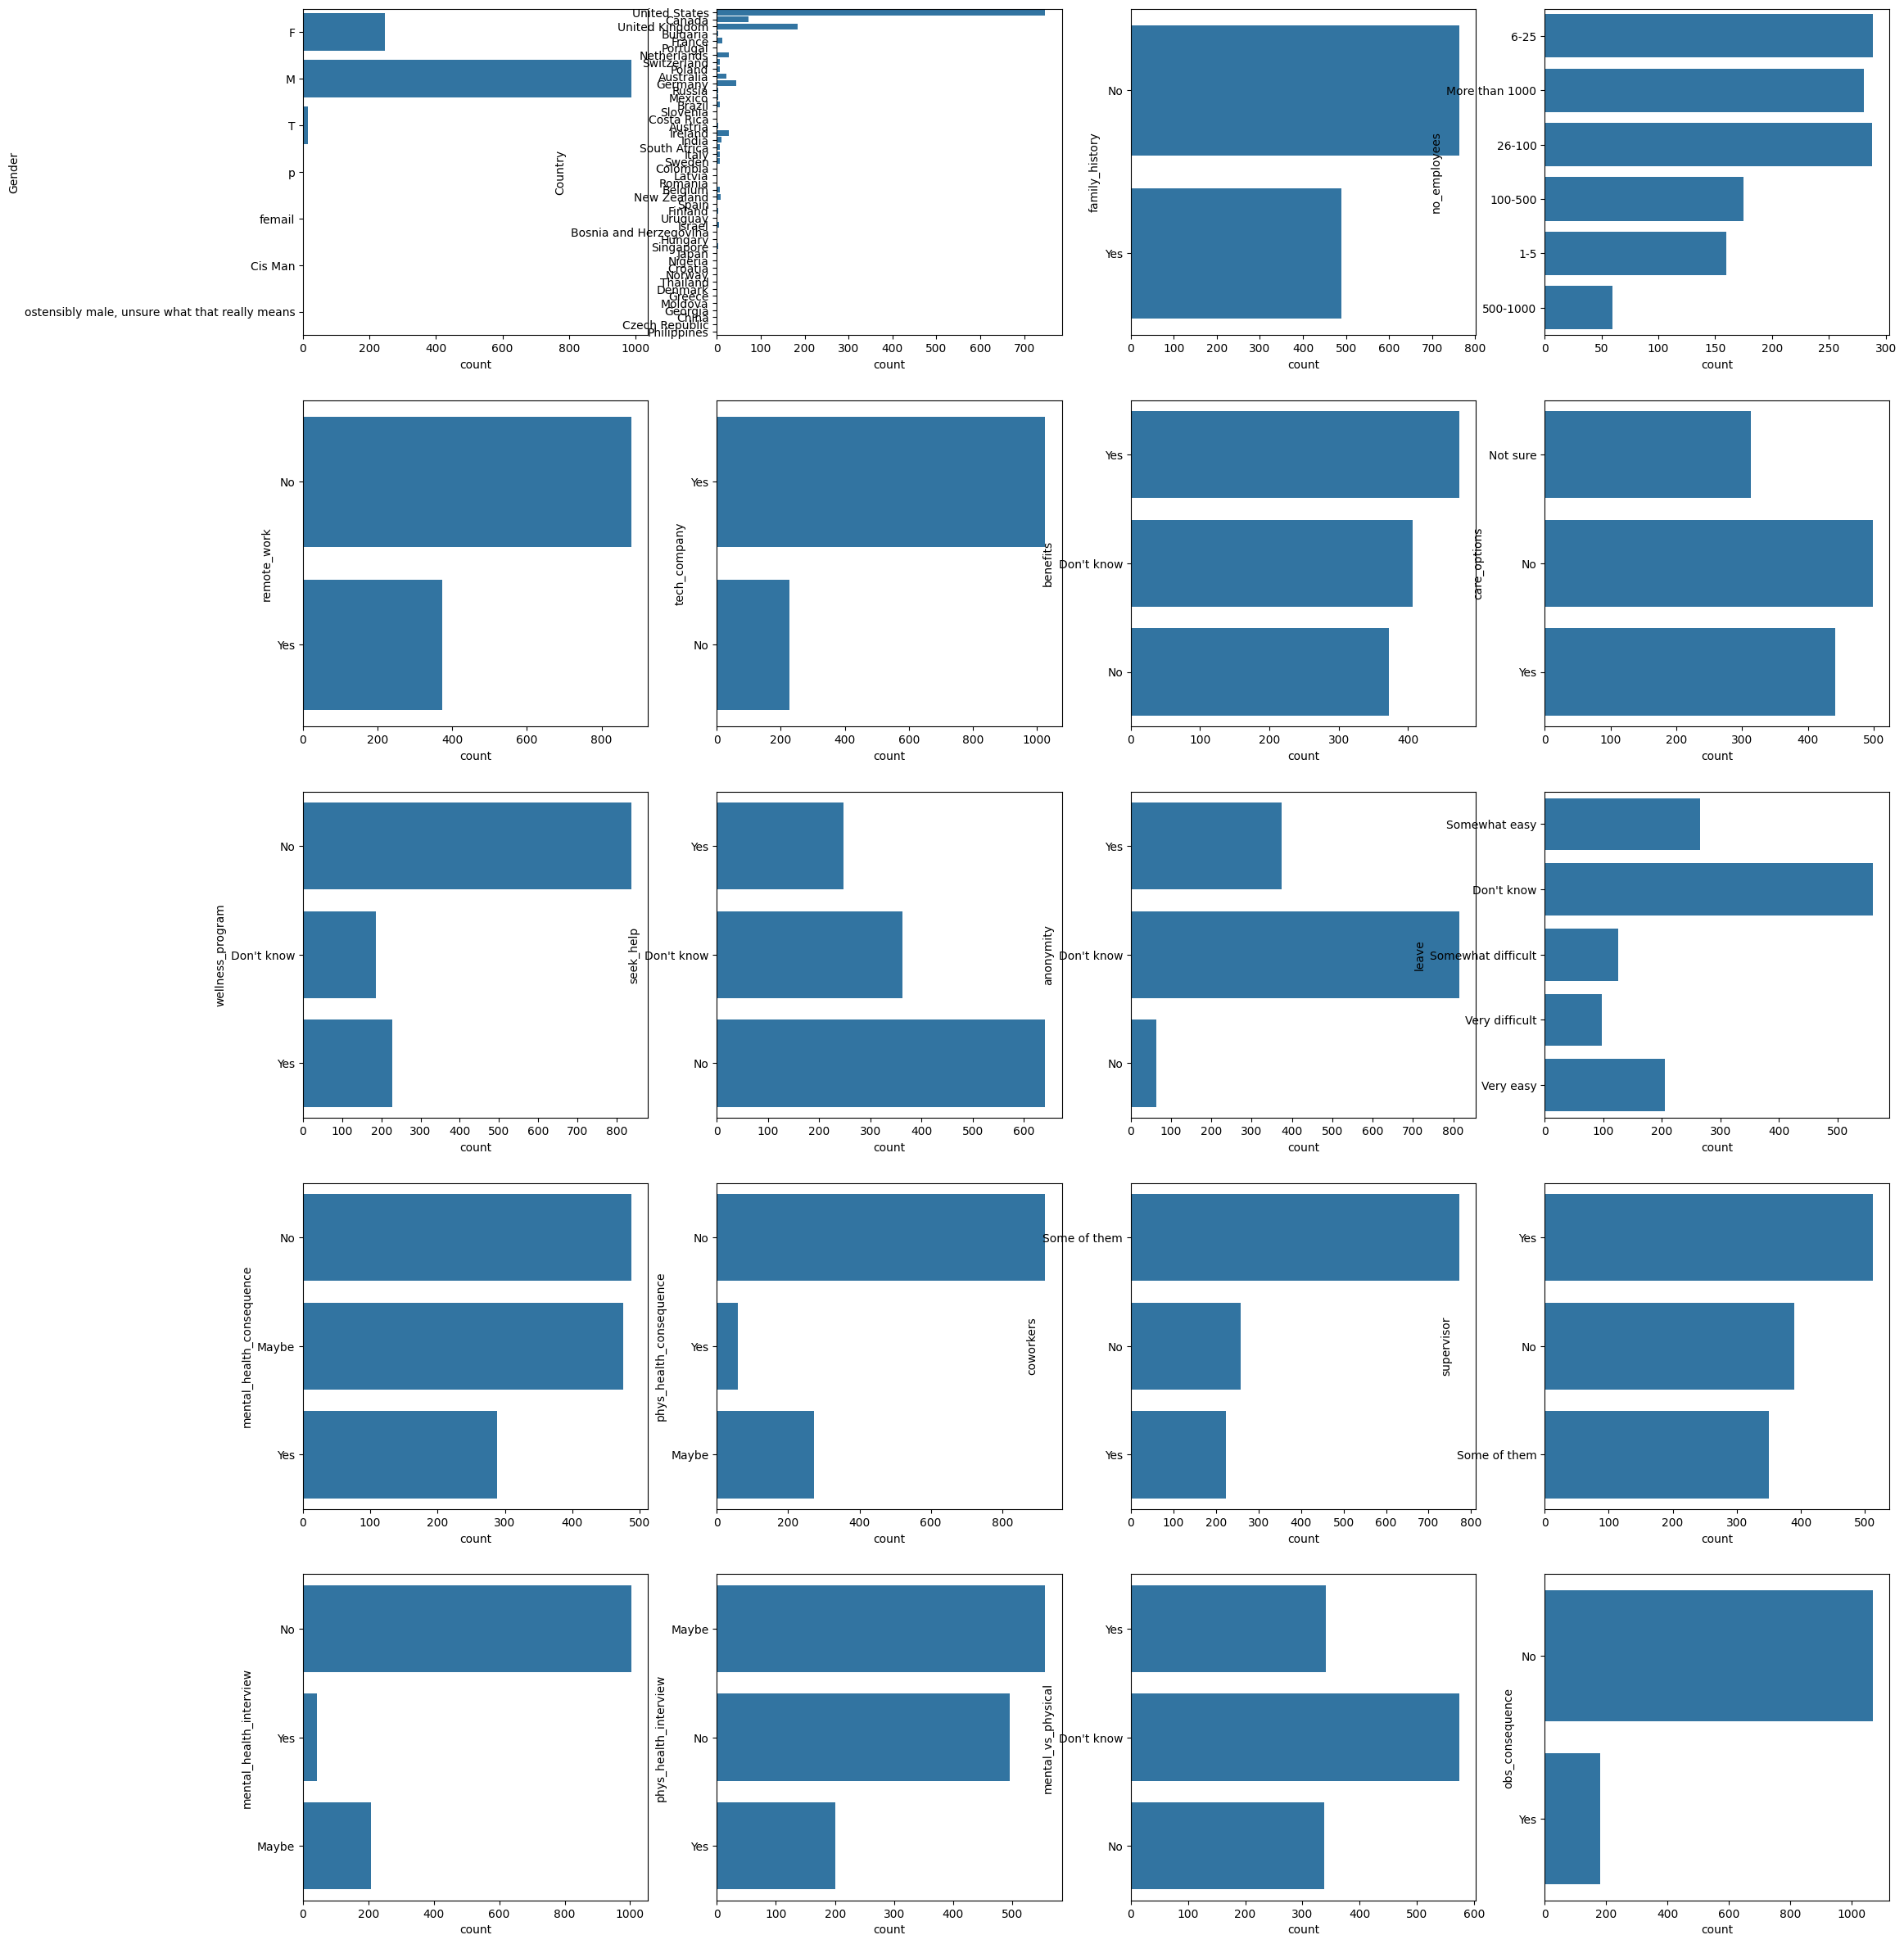

In [ ]:
# create a list of all categorical variables
# initiate an empty list to store the categorical variables
categorical=[]
z=['Country','state']
# use for loop to check the data type of each variable
for column in data_set:

    # use 'if' statement with condition to check the categorical type
    if is_string_dtype(data_set[column]):
        if column!=z:

        # append the variables with 'categoric' data type in the list 'categorical'
             categorical.append(column)


# plot the count plot for each categorical variable
fig, ax = plt.subplots(nrows = 5, ncols = 4, figsize=(25, 30))

# use for loop to plot the count plot for each variable
for variable, subplot in zip(categorical, ax.flatten()):

    # use countplot() to plot the graph
    sns.countplot(data_set[variable], ax = subplot)

# display the plot
plt.show()

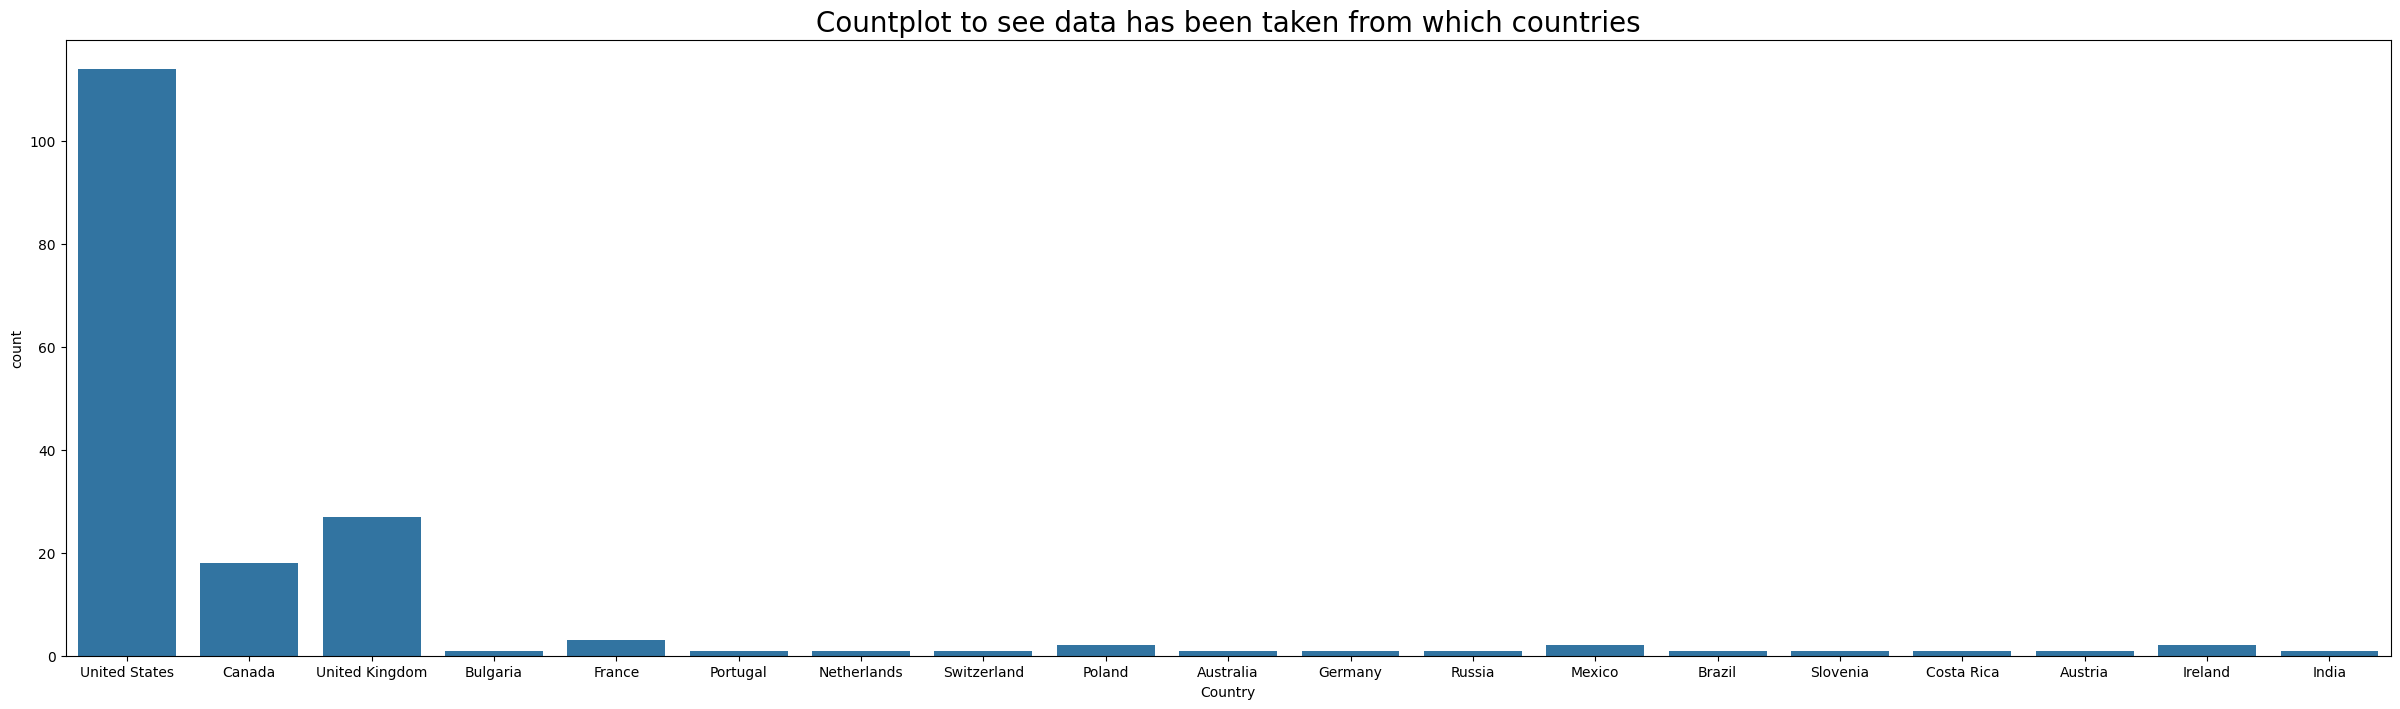

In [ ]:
# plotting the counterplot for the country column
#to see
plt.figure(figsize=(30,8))
sns.countplot(x='Country', data=data_set.iloc[:180])
plt.title("Countplot to see data has been taken from which countries",fontsize=20)
plt.show()

In [ ]:
# finding the missing values

In [ ]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
Total = data_set.isnull().sum().sort_values(ascending = False)

# calculate the percentage of missing values
Percent = ((Total*100)/data_set.isnull().count()).sort_values(ascending = False)

# concat the 'Total' and 'Percent' columns using 'concat' function
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
missing_data

,Total,Percentage of Missing Values
comments,1091,87.071030
state,513,40.941740
work_interfere,262,20.909816
self_employed,18,1.436552
Country,0,0.000000
Gender,0,0.000000
family_history,0,0.000000
treatment,0,0.000000
no_employees,0,0.000000
remote_work,0,0.000000


In [ ]:
# handling the missing values

In [ ]:
data_set.drop('comments',axis=1,inplace=True)
data_set['work_interfere']=data_set['work_interfere'].fillna('Not mentioned')
data_set.drop(['state','Country'],axis=1,inplace=True)
data_set.dropna(axis=0, inplace=True)

In [ ]:
# preparing the data for building model

In [ ]:
#Creating two dataframes df_features and df_target,df_features contains all the important features which we will dummy encode
#df_target which contains the target variable
data_set_features=data_set.drop(['treatment', 'Age','Date', 'Time'],axis=1)
data_set_target=data_set['treatment']

In [ ]:
#dummy encoding the feature(categorical) variables
data_set_dummy=pd.get_dummies(data_set_features,drop_first=True)

In [ ]:
#storing the features in X and the target in y variable
X=data_set_dummy
y=pd.DataFrame(data_set_target)

In [ ]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):

    # return the performace measures on test set
    return(classification_report(y_test, y_pred))

In [ ]:
# create a generalized function to calculate the metrics values for test set
def kappa_score(model):

    # return the kappa score on test set
    return(cohen_kappa_score(y_test, y_pred))

In [ ]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model):

    # create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

In [ ]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model):

    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC Curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred),4)))

    # plot the grid
    plt.grid(True)

In [ ]:
# create an empty dataframe to store the scores for various classification algorithms
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score',
                                   'Kappa Score', 'f1-score'])

def update_score_card(model_name):

    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    # score_card = score_card.append({'Model': model_name,
    #                                 'AUC Score' : roc_auc_score(y_test, y_pred),
    #                                 'Precision Score': metrics.precision_score(y_test, y_pred),
    #                                 'Recall Score': metrics.recall_score(y_test, y_pred),
    #                                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
    #                                 'Kappa Score': cohen_kappa_score(y_test, y_pred),
    #                                 'f1-score': metrics.f1_score(y_test, y_pred)},
    #                                 ignore_index = True)

    new_row = {
        'Model': model_name,
        'AUC Score'      : roc_auc_score(y_test, y_pred),
        'Precision Score': metrics.precision_score(y_test, y_pred),
        'Recall Score'   : metrics.recall_score(y_test, y_pred),
        'Accuracy Score' : metrics.accuracy_score(y_test, y_pred),
        'Kappa Score'    : cohen_kappa_score(y_test, y_pred),
        'f1-score'       : metrics.f1_score(y_test, y_pred)
    }

    score_card.loc[len(score_card)] = new_row
    return score_card

In [ ]:
# split data into train subset and test subset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print("X_train",X_train.shape)
print("y_train",y_train.shape)

# print dimension of test set
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (864, 48)
y_train (864, 1)
X_test (371, 48)
y_test (371, 1)


In [ ]:
# SVM

In [ ]:
# build the model
svclassifier = SVC(kernel = 'linear')

# fit the model
svc_model=svclassifier.fit(X_train, y_train)

In [ ]:
# predict the values
y_pred = svclassifier.predict(X_test)

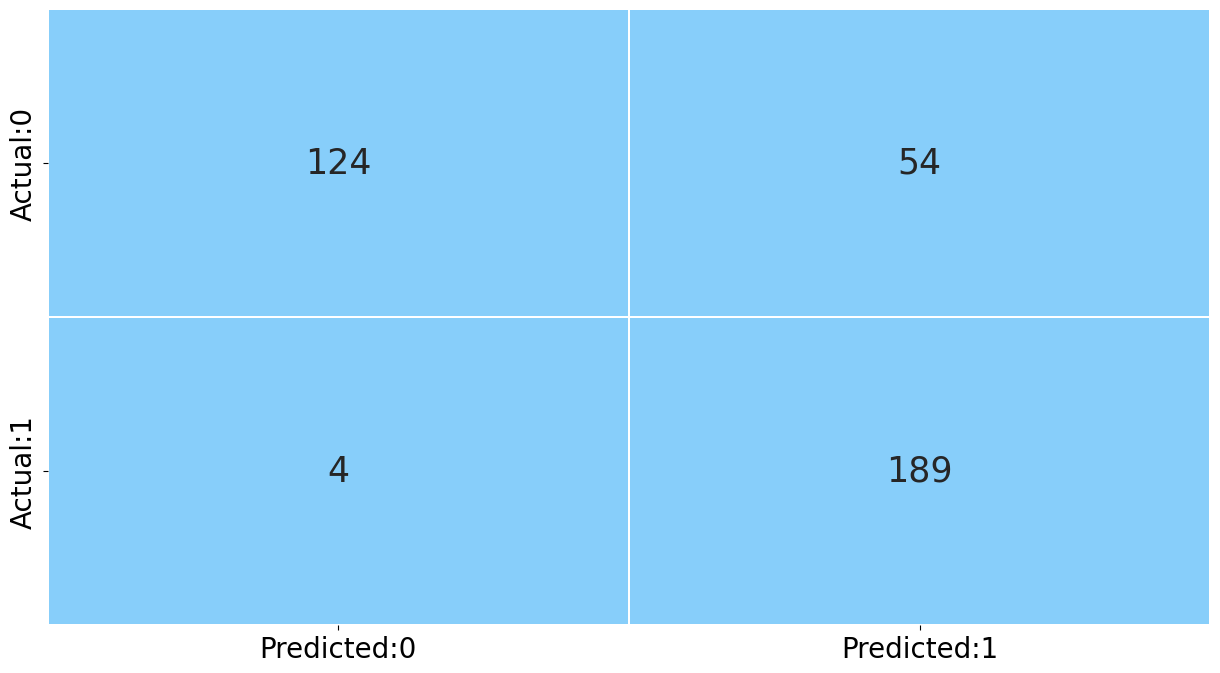

In [ ]:
# call the function to plot the confusion matrix
plot_confusion_matrix(svc_model)

In [ ]:
# compute the performance measures on test data
test_report = get_test_report(svc_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.97      0.70      0.81       178
           1       0.78      0.98      0.87       193

    accuracy                           0.84       371
   macro avg       0.87      0.84      0.84       371
weighted avg       0.87      0.84      0.84       371



In [ ]:
# compute kappa score on test set
kappa_value = kappa_score(svc_model)

# print the kappa value
print(kappa_value)

0.6833632537743901


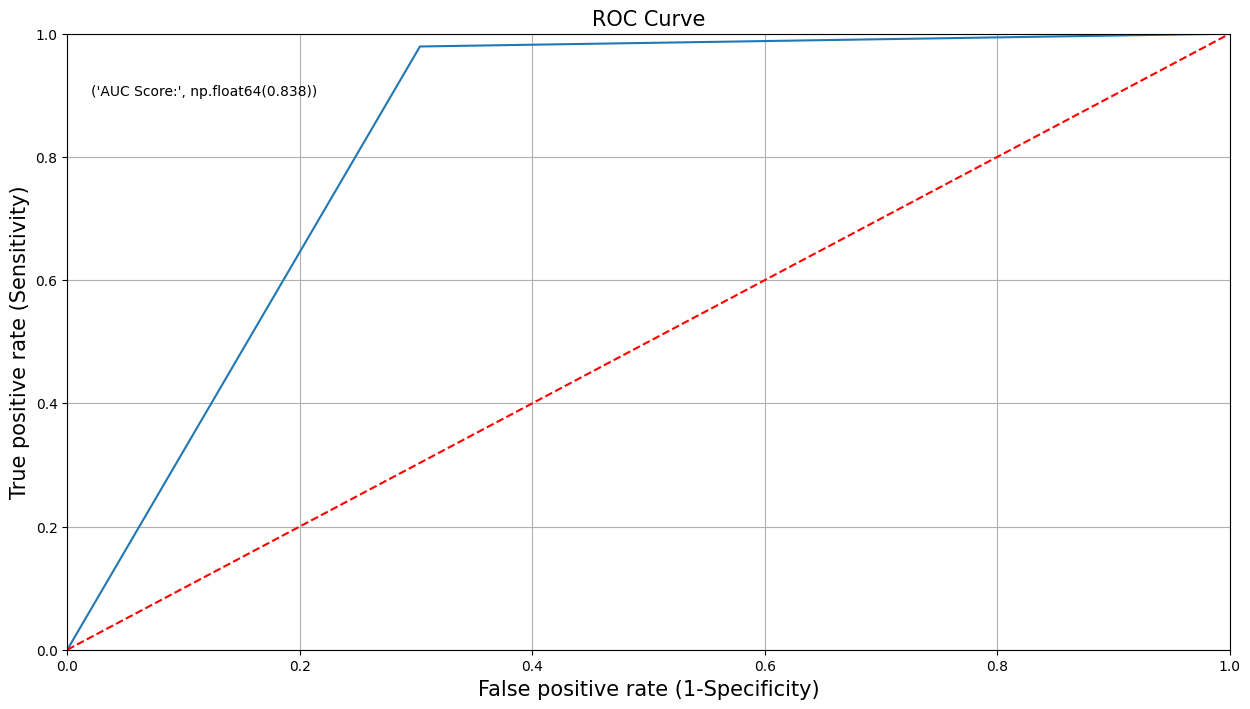

In [ ]:
plot_roc(svc_model)

In [ ]:
update_score_card(model_name='SVM')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM,0.837952,0.777778,0.979275,0.843666,0.683363,0.866972


In [ ]:
# SVM (sigmoid)

In [ ]:
# build the model
svclassifier = SVC(kernel='sigmoid')
# fit the model
svm_sigmoid=svclassifier.fit(X_train, y_train)

In [ ]:
# predict the values
y_pred  = svclassifier.predict(X_test)

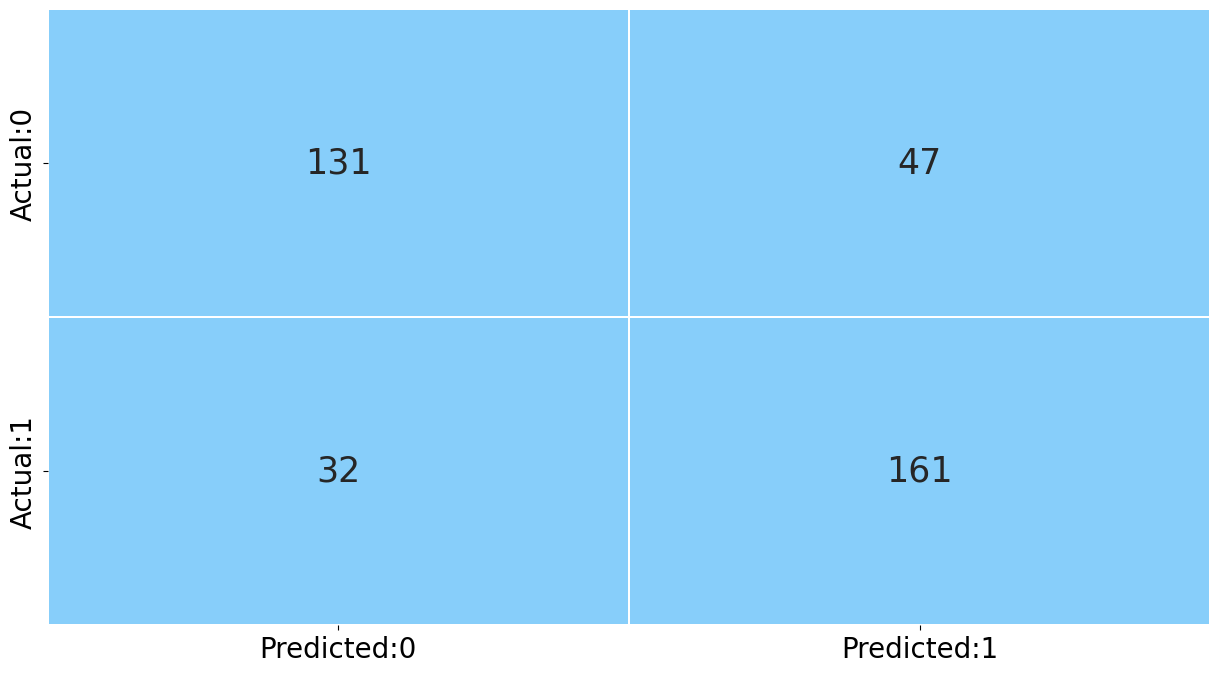

In [ ]:
plot_confusion_matrix(svm_sigmoid)

In [ ]:
test_report=get_test_report(svm_sigmoid)
print(test_report)

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       178
           1       0.77      0.83      0.80       193

    accuracy                           0.79       371
   macro avg       0.79      0.79      0.79       371
weighted avg       0.79      0.79      0.79       371



In [ ]:
# compute kappa score on test set
kappa_value = kappa_score(svm_sigmoid)

# print the kappa value
print(kappa_value)

0.5720251741308062


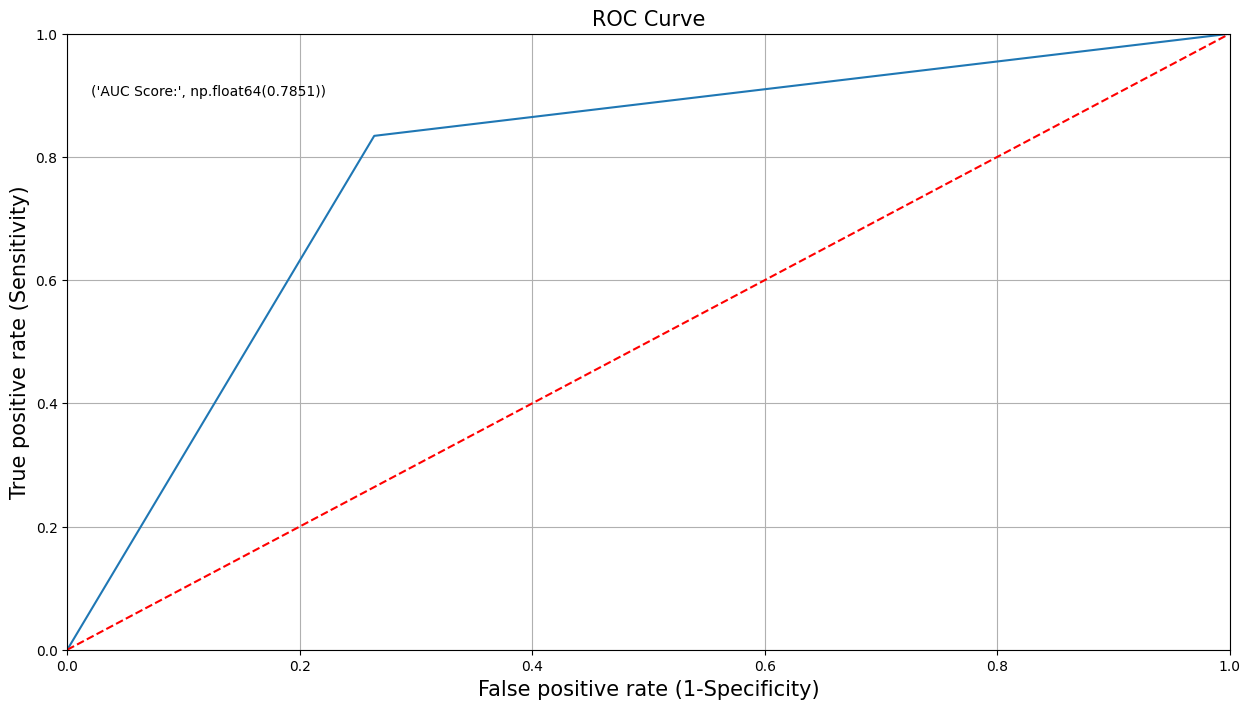

In [ ]:
plot_roc(svm_sigmoid)

In [ ]:
update_score_card(model_name='SVM using sigmoid')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM,0.837952,0.777778,0.979275,0.843666,0.683363,0.866972
1,SVM using sigmoid,0.785076,0.774038,0.834197,0.787062,0.572025,0.802993
